# E6. Detección de Anomalías en Series Temporales utilizando Modelos de IA

En este Notebook se presentan técnicas basadas en inteligencia artificial para detectar anomalías en series temporales. En concreto, se muestra la aplicación del algoritmo **Isolation Forest** y se comentan brevemente otras alternativas como **One-Class SVM** y **Autoencoders**.

El objetivo es comparar estas técnicas con los métodos estadísticos vistos anteriormente, demostrando su potencial para identificar valores atípicos de forma automática.

## 1. Importación de Librerías y Creación del Dataset

Utilizaremos un dataset simulado similar al anterior, que representa el consumo energético mensual (en kWh) con algunos valores anómalos.

Vista previa del dataset:


,Consumo_kWh
Fecha,
2020-01-31,209.934283
2020-02-29,197.234714
2020-03-31,212.953771
2020-04-30,230.460597
2020-05-31,195.316933
2020-06-30,300.000000
2020-07-31,231.584256
2020-08-31,215.348695
2020-09-30,190.610512


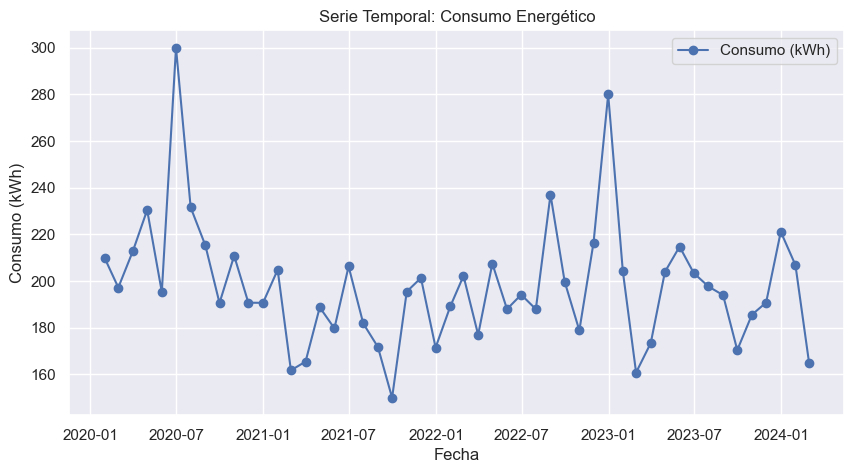

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Configuración de estilo para gráficos
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Generar dataset simulado
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=50, freq='ME')
consumo = np.random.normal(loc=200, scale=20, size=len(dates))

# Introducimos algunas anomalías
consumo[5] = 300
consumo[20] = 150
consumo[35] = 280

df = pd.DataFrame({'Fecha': dates, 'Consumo_kWh': consumo})
df.set_index('Fecha', inplace=True)

print('Vista previa del dataset:')
display(df.head(10))

# Visualización de la serie temporal
plt.figure()
plt.plot(df.index, df['Consumo_kWh'], marker='o', label='Consumo (kWh)')
plt.title('Serie Temporal: Consumo Energético')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

## 2. Detección de Anomalías con Isolation Forest

Isolation Forest es un algoritmo de detección de anomalías que funciona aislando observaciones. Es especialmente eficaz en datasets de alta dimensionalidad, pero también se aplica en series temporales de una sola variable.

A continuación, se aplica este método para detectar anomalías en nuestro dataset.

In [15]:
# Definir el modelo Isolation Forest
modelo_if = IsolationForest(contamination=0.1, random_state=42)

# Ajustar el modelo a los datos (reshape necesario para datos unidimensionales)
df['Anomalia_IF'] = modelo_if.fit_predict(df[['Consumo_kWh']])

# Convertir la salida: 1 indica comportamiento normal, -1 anomalía
df['Anomalia_IF'] = df['Anomalia_IF'].map({1: False, -1: True})

print('Detección de anomalías usando Isolation Forest:')
display(df[['Consumo_kWh', 'Anomalia_IF']])

Detección de anomalías usando Isolation Forest:


,Consumo_kWh,Anomalia_IF
Fecha,,
2020-01-31,209.934283,False
2020-02-29,197.234714,False
2020-03-31,212.953771,False
2020-04-30,230.460597,False
2020-05-31,195.316933,False
2020-06-30,300.000000,True
2020-07-31,231.584256,False
2020-08-31,215.348695,False
2020-09-30,190.610512,False


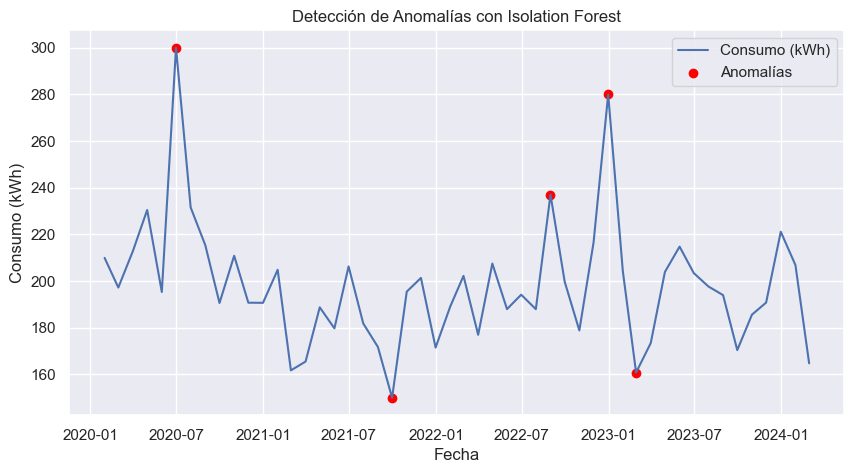

In [16]:
# Visualización de resultados
plt.figure()
plt.plot(df.index, df['Consumo_kWh'], label='Consumo (kWh)')
plt.scatter(df.index[df['Anomalia_IF']], df['Consumo_kWh'][df['Anomalia_IF']], color='red', label='Anomalías')
plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

## 3. One-Class-SVM

Además de Isolation Forest, existen otros métodos que se pueden emplear para detectar anomalías en series temporales:

One-Class-SVM utiliza un enfoque de clasificación para identificar datos que se desvían de la norma. Es eficaz pero puede requerir ajuste cuidadoso de parámetros.

In [17]:
# Ejemplo rápido de One-Class SVM
modelo_ocsvm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
df['Anomalia_OCSVM'] = modelo_ocsvm.fit_predict(df[['Consumo_kWh']])
df['Anomalia_OCSVM'] = df['Anomalia_OCSVM'].map({1: False, -1: True})
display(df[['Consumo_kWh', 'Anomalia_OCSVM']])

,Consumo_kWh,Anomalia_OCSVM
Fecha,,
2020-01-31,209.934283,True
2020-02-29,197.234714,True
2020-03-31,212.953771,False
2020-04-30,230.460597,True
2020-05-31,195.316933,False
2020-06-30,300.000000,False
2020-07-31,231.584256,True
2020-08-31,215.348695,False
2020-09-30,190.610512,False


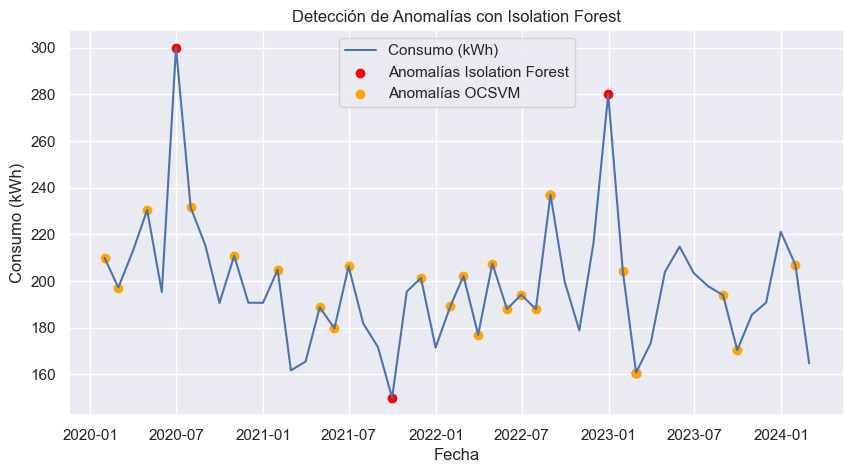

In [18]:
# Visualización de resultados
plt.figure()
plt.plot(df.index, df['Consumo_kWh'], label='Consumo (kWh)')
plt.scatter(df.index[df['Anomalia_IF']], df['Consumo_kWh'][df['Anomalia_IF']], color='red', label='Anomalías Isolation Forest')
plt.scatter(df.index[df['Anomalia_OCSVM']], df['Consumo_kWh'][df['Anomalia_OCSVM']], color='orange', label='Anomalías OCSVM')
plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

## 4. Autoencoders
Redes neuronales que aprenden a reconstruir los datos. Las diferencias entre la entrada y la salida pueden utilizarse para identificar anomalías. Este método es especialmente útil para series temporales multivariadas y complejas.

*Nota:* La implementación de autoencoders es más avanzada y requiere conocimientos en deep learning (usando Keras o TensorFlow)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler

import sys
sys.setrecursionlimit(20000)

# Normalización de los datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Consumo_kWh']])

# Construir un autoencoder simple
input_dim = data_scaled.shape[1]
encoding_dim = 1  # Tamaño de la capa oculta

input_layer = Input(shape=(input_dim,))
# Capa de codificación con regularización L1 para promover sparsity
encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(1e-5))(input_layer)
# Capa de decodificación para reconstruir la entrada
decoder = Dense(input_dim, activation="linear")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

RecursionError: maximum recursion depth exceeded

In [ ]:
# Entrenar el autoencoder
history = autoencoder.fit(data_scaled, data_scaled,
                          epochs=50,
                          batch_size=4,
                          shuffle=True,
                          verbose=0)

In [ ]:
# Guardar el modelo entrenado
autoencoder.save('data/autoencoder_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
modelo_cargado = load_model('autoencoder_model.h5')

In [ ]:
# Obtener las reconstrucciones y calcular el error cuadrático medio (MSE)
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)

# Definir un umbral para detectar anomalías (por ejemplo, media + 2*desviación estándar)
threshold = np.mean(mse) + 2 * np.std(mse)

In [ ]:
# Marcar las anomalías basadas en el error de reconstrucción
df['Anomalia_AE'] = mse > threshold

print("Error de reconstrucción (MSE):")
print(mse)
print("Umbral de detección:", threshold)
display(df[['Consumo_kWh', 'Anomalia_AE']])

In [ ]:
# Visualización de los resultados
plt.figure()
plt.plot(df.index, df['Consumo_kWh'], marker='o', label='Consumo (kWh)')
plt.scatter(df.index[df['Anomalia_AE']], df['Consumo_kWh'][df['Anomalia_AE']], 
            color='red', label='Anomalías detectadas (AE)')
plt.title('Detección de Anomalías con Autoencoder')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

## 5. Conclusiones

En este Notebook se ha demostrado la aplicación de modelos de IA para la detección de anomalías en series temporales. En concreto:

- Se ha utilizado **Isolation Forest** para identificar automáticamente anomalías en un dataset simulado.
- Se han mencionado otras técnicas como **One-Class SVM** y **Autoencoders**, que pueden adaptarse a diferentes necesidades y complejidades de datos.

Estos métodos permiten detectar anomalías de forma automatizada, facilitando el análisis en entornos donde los métodos estadísticos tradicionales pueden ser insuficientes.

Tabla comparativa que resume las principales características de los tres métodos de detección de anomalías presentados:

| **Método**             | **Enfoque**                                          | **Ventajas**                                                                                           | **Desventajas**                                                                                       | **Notas/Requerimientos**                                                      |
|------------------------|------------------------------------------------------|--------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **Isolation Forest**   | Basado en árboles de decisión que aíslan observaciones | - Rápido y escalable<br>- Fácil de implementar<br>- Robusto ante outliers                               | - Sensible a la elección del parámetro de contaminación<br>- Menor interpretabilidad en el modelo      | Funciona bien en datos unidimensionales y multivariados.                      |
| **One-Class SVM**      | Clasificador de una clase usando SVM                 | - Eficaz para detectar distribuciones no lineales<br>- Buen rendimiento en datasets pequeños             | - Requiere ajuste cuidadoso de parámetros (kernel, gamma, nu)<br>- Más costoso computacionalmente     | Se recomienda escalar los datos y probar distintos kernels según el caso.     |
| **Autoencoder**        | Red neuronal no supervisada que aprende a reconstruir la entrada | - Muy flexible, puede capturar patrones complejos<br>- Adecuado para datos multivariados                 | - Requiere mayor cantidad de datos y tiempo de entrenamiento<br>- Más complejidad en la implementación   | Necesita definir un umbral de error de reconstrucción y conocimientos en deep learning. |
